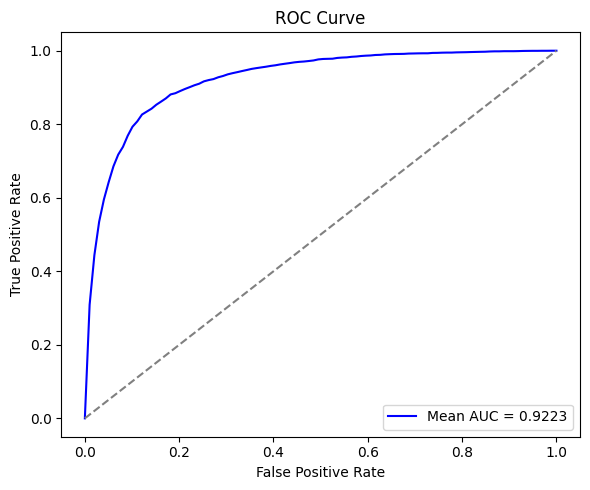

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle

# 从文件中读取列表
with open('/ifs/data/fanziyu/project/LSGNN_fzy/result_10/result_LightGBM_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)

# 初始化变量
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(6, 5))

for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]
    
    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)


# 绘制平均ROC曲线
plt.subplot()
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='blue', label=f'Mean AUC = {mean_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle

# 从文件中读取列表
with open('/ifs/data/fanziyu/project/LSGNN_fzy/result_10/result_LightGBM_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)

# 初始化变量
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(12, 5))

for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]
    
    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} AUC = {roc_auc:.2f}')
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, alpha=0.3, label=f'Fold {i+1} AUPR = {aupr:.2f}')

# 绘制平均ROC曲线
plt.subplot(1, 2, 1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='blue', label=f'Mean AUC = {mean_auc:.2f} ± {std_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# 绘制平均Precision-Recall曲线
plt.subplot(1, 2, 2)
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
plt.plot(mean_recall, mean_precision, color='blue', label=f'Mean AUPR = {mean_aupr:.2f} ± {std_aupr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


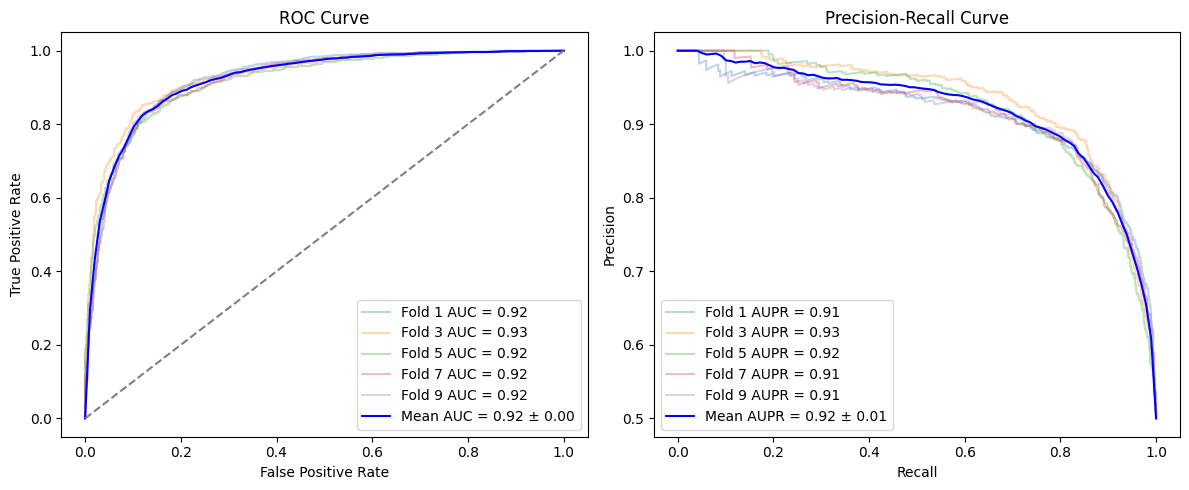

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle

# 从文件中读取列表
with open('/ifs/data/fanziyu/project/LSGNN_fzy/result_10/result_LightGBM_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)

# 初始化变量
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(12, 5))
ll1 = []
ll2 = []
for i in [0,2,4,6,8]:
    Y_test = Y_test_list[i].tolist() + Y_test_list[i+1].tolist()
    y_score = y_score_RandomF_list[i].tolist() + y_score_RandomF_list[i+1].tolist()

    ll1.append(Y_test)
    ll2.append(y_score)
    
    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} AUC = {roc_auc:.2f}')
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, alpha=0.3, label=f'Fold {i+1} AUPR = {aupr:.2f}')
import pickle
with open('/ifs/data/fanziyu/project/LSGNN_fzy/src/img/LSNS_ne.pkl', 'wb') as f:
    pickle.dump((ll1, ll2), f)
# 绘制平均ROC曲线
plt.subplot(1, 2, 1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='blue', label=f'Mean AUC = {mean_auc:.4f} ± {std_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# 绘制平均Precision-Recall曲线
plt.subplot(1, 2, 2)
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
plt.plot(mean_recall, mean_precision, color='blue', label=f'Mean AUPR = {mean_aupr:.4f} ± {std_aupr:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc
import pickle

# 从文件中读取列表
with open('/ifs/data/fanziyu/project/LSGNN_fzy/result_10/result_LightGBM_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)

# 初始化变量
tprs = []
aucs = []
precisions = []
auprs = []

accs = []
precisions_scores = []
recalls = []
f1s = []

ll1 = []
ll2 = []
for i in [0, 2, 4, 6, 8]:
    Y_test = Y_test_list[i].tolist() + Y_test_list[i + 1].tolist()
    y_score = y_score_RandomF_list[i].tolist() + y_score_RandomF_list[i + 1].tolist()

    ll1.append(Y_test)
    ll2.append(y_score)

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(np.linspace(0, 1, 100), fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(np.linspace(0, 1, 100), recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

    # 二分类阈值设定为0.5，计算分类结果
    y_pred = np.array(y_score) >= 0.45

    # 计算ACC, P, RE, F1
    acc = accuracy_score(Y_test, y_pred)
    precision_score_value = precision_score(Y_test, y_pred)
    recall_value = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    accs.append(acc)
    precisions_scores.append(precision_score_value)
    recalls.append(recall_value)
    f1s.append(f1)

# 打印每折的ACC, P, RE, F1
for i in range(len(accs)):
    print(f"Fold {i+1}: ACC = {accs[i]:.2f}, P = {precisions_scores[i]:.2f}, RE = {recalls[i]:.2f}, F1 = {f1s[i]:.2f}")

# 计算并打印平均值和标准差
mean_acc = np.mean(accs)
std_acc = np.std(accs)
mean_precision = np.mean(precisions_scores)
std_precision = np.std(precisions_scores)
mean_recall = np.mean(recalls)
std_recall = np.std(recalls)
mean_f1 = np.mean(f1s)
std_f1 = np.std(f1s)

print(f"Mean ACC = {mean_acc:.4f} ± {std_acc:.4f}")
print(f"Mean P = {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean RE = {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 = {mean_f1:.4f} ± {std_f1:.4f}")




Fold 1: ACC = 0.85, P = 0.84, RE = 0.87, F1 = 0.85
Fold 2: ACC = 0.86, P = 0.85, RE = 0.86, F1 = 0.86
Fold 3: ACC = 0.84, P = 0.82, RE = 0.87, F1 = 0.84
Fold 4: ACC = 0.84, P = 0.82, RE = 0.88, F1 = 0.85
Fold 5: ACC = 0.85, P = 0.82, RE = 0.89, F1 = 0.85
Mean ACC = 0.8477 ± 0.0063
Mean P = 0.8306 ± 0.0148
Mean RE = 0.8743 ± 0.0112
Mean F1 = 0.8517 ± 0.0048


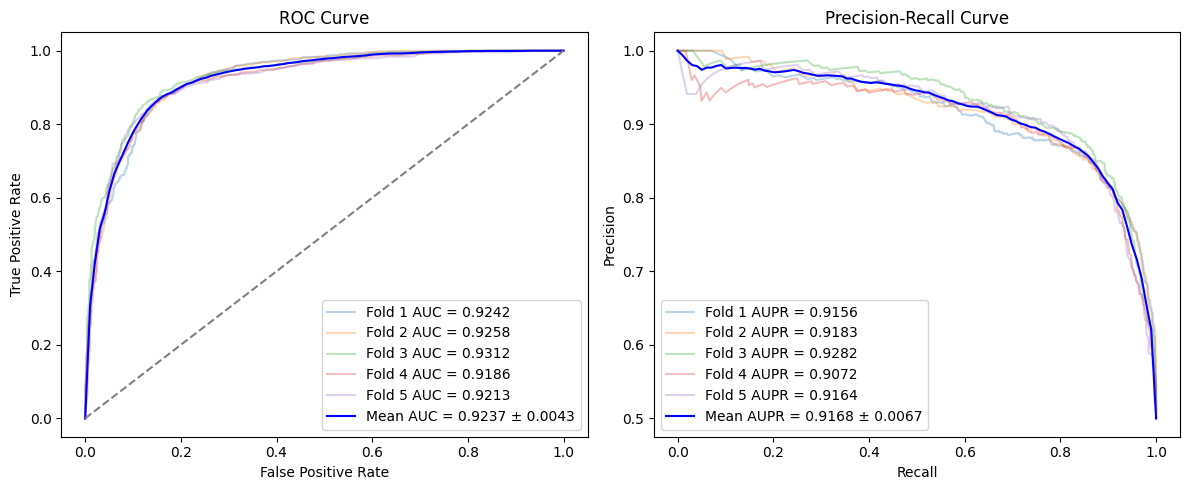

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle

# 从文件中读取列表
with open('../../result_5/result_Bag_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)

# 初始化变量
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(12, 5))

for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]
    
    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} AUC = {roc_auc:.4f}')
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, alpha=0.3, label=f'Fold {i+1} AUPR = {aupr:.4f}')

# 绘制平均ROC曲线
plt.subplot(1, 2, 1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='blue', label=f'Mean AUC = {mean_auc:.4f} ± {std_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# 绘制平均Precision-Recall曲线
plt.subplot(1, 2, 2)
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
plt.plot(mean_recall, mean_precision, color='blue', label=f'Mean AUPR = {mean_aupr:.4f} ± {std_aupr:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


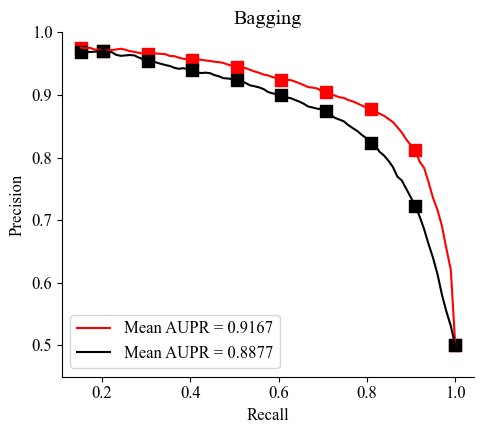

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle
plt.rcParams['font.family'] = 'Times New Roman'
# 从文件中读取列表
with open('../../result_5/result_Bag_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)
with open('../../result_5/result_Bag_random.pkl', 'rb') as f:
    Y_test_list2, y_score_RandomF_list2 = pickle.load(f)


precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(5, 4.5))
ax = plt.subplot()
for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

# 绘制平均Precision-Recall曲线
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
s_x = []
s_y = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x.append(mean_recall[i])
    s_y.append(mean_precision[i])


precisions2 = []
auprs2 = []
mean_recall2 = np.linspace(0, 1, 100)

for i in range(len(Y_test_list2)):
    Y_test2 = Y_test_list2[i]
    y_score2 = y_score_RandomF_list2[i]

    # 计算Precision-Recall曲线
    precision2, recall2, _ = precision_recall_curve(Y_test2, y_score2)
    precision_interp2 = np.interp(mean_recall2, recall2[::-1], precision2[::-1])
    precisions2.append(precision_interp2)
    aupr2 = auc(recall2, precision2)
    auprs2.append(aupr2)

# 绘制平均Precision-Recall曲线
mean_precision2 = np.mean(precisions2, axis=0)
mean_aupr2 = auc(mean_recall2, mean_precision2)
std_aupr2 = np.std(auprs2)
s_x2 = []
s_y2 = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x2.append(mean_recall2[i])
    s_y2.append(mean_precision2[i])

plt.scatter(s_x, s_y, s=80, c='red', marker='s', alpha=1)
plt.plot(mean_recall[15:], mean_precision[15:], color='red', label=f'Mean AUPR = 0.9167')
plt.scatter(s_x2, s_y2, s=80, c='black', marker='s', alpha=1)
plt.plot(mean_recall2[15:], mean_precision2[15:], color='black', label=f'Mean AUPR = 0.8877')
plt.xlabel('Recall')
plt.ylabel('Precision')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Bagging')
plt.legend(loc='lower left')
plt.ylim(0.45, 1)
plt.tight_layout()
plt.show()

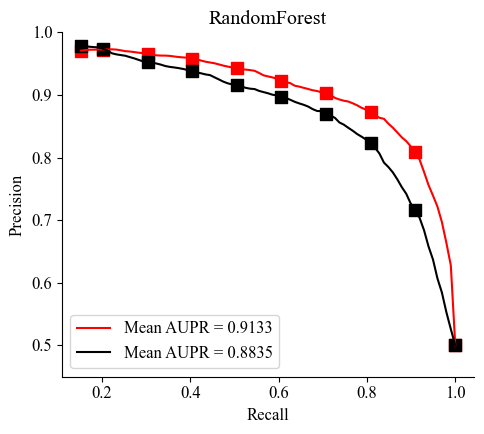

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle
plt.rcParams['font.family'] = 'Times New Roman'
# 从文件中读取列表
with open('../../result_5/result_RandomForest_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)
with open('../../result_5/result_RandomForest_random.pkl', 'rb') as f:
    Y_test_list2, y_score_RandomF_list2 = pickle.load(f)


precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(5, 4.5))
ax = plt.subplot()
for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

# 绘制平均Precision-Recall曲线
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
s_x = []
s_y = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x.append(mean_recall[i])
    s_y.append(mean_precision[i])


precisions2 = []
auprs2 = []
mean_recall2 = np.linspace(0, 1, 100)

for i in range(len(Y_test_list2)):
    Y_test2 = Y_test_list2[i]
    y_score2 = y_score_RandomF_list2[i]

    # 计算Precision-Recall曲线
    precision2, recall2, _ = precision_recall_curve(Y_test2, y_score2)
    precision_interp2 = np.interp(mean_recall2, recall2[::-1], precision2[::-1])
    precisions2.append(precision_interp2)
    aupr2 = auc(recall2, precision2)
    auprs2.append(aupr2)

# 绘制平均Precision-Recall曲线
mean_precision2 = np.mean(precisions2, axis=0)
mean_aupr2 = auc(mean_recall2, mean_precision2)
std_aupr2 = np.std(auprs2)
s_x2 = []
s_y2 = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x2.append(mean_recall2[i])
    s_y2.append(mean_precision2[i])

plt.scatter(s_x, s_y, s=80, c='red', marker='s', alpha=1)
plt.plot(mean_recall[15:], mean_precision[15:], color='red', label=f'Mean AUPR = 0.9133')
plt.scatter(s_x2, s_y2, s=80, c='black', marker='s', alpha=1)
plt.plot(mean_recall2[15:], mean_precision2[15:], color='black', label=f'Mean AUPR = 0.8835')
plt.xlabel('Recall')
plt.ylabel('Precision')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('RandomForest')
plt.legend(loc='lower left')
plt.ylim(0.45, 1)
plt.tight_layout()
plt.show()

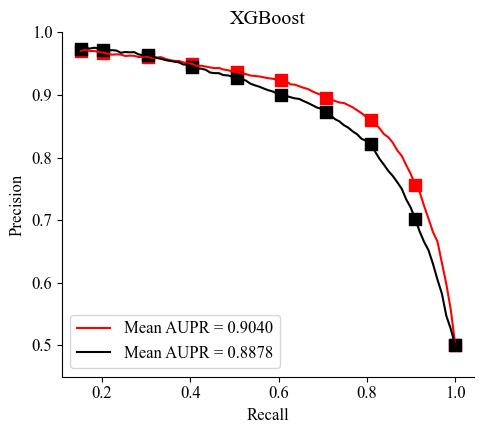

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle
plt.rcParams['font.family'] = 'Times New Roman'
# 从文件中读取列表
with open('../../result_5/result_XGBoost_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)
with open('../../result_5/result_XGBoost_random.pkl', 'rb') as f:
    Y_test_list2, y_score_RandomF_list2 = pickle.load(f)


precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(5, 4.5))
ax = plt.subplot()
for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

# 绘制平均Precision-Recall曲线
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
s_x = []
s_y = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x.append(mean_recall[i])
    s_y.append(mean_precision[i])


precisions2 = []
auprs2 = []
mean_recall2 = np.linspace(0, 1, 100)

for i in range(len(Y_test_list2)):
    Y_test2 = Y_test_list2[i]
    y_score2 = y_score_RandomF_list2[i]

    # 计算Precision-Recall曲线
    precision2, recall2, _ = precision_recall_curve(Y_test2, y_score2)
    precision_interp2 = np.interp(mean_recall2, recall2[::-1], precision2[::-1])
    precisions2.append(precision_interp2)
    aupr2 = auc(recall2, precision2)
    auprs2.append(aupr2)

# 绘制平均Precision-Recall曲线
mean_precision2 = np.mean(precisions2, axis=0)
mean_aupr2 = auc(mean_recall2, mean_precision2)
std_aupr2 = np.std(auprs2)
s_x2 = []
s_y2 = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x2.append(mean_recall2[i])
    s_y2.append(mean_precision2[i])

plt.scatter(s_x, s_y, s=80, c='red', marker='s', alpha=1)
plt.plot(mean_recall[15:], mean_precision[15:], color='red', label=f'Mean AUPR = 0.9040')
plt.scatter(s_x2, s_y2, s=80, c='black', marker='s', alpha=1)
plt.plot(mean_recall2[15:], mean_precision2[15:], color='black', label=f'Mean AUPR = 0.8878')
plt.xlabel('Recall')
plt.ylabel('Precision')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('XGBoost')
plt.legend(loc='lower left')
plt.ylim(0.45, 1)
plt.tight_layout()
plt.show()

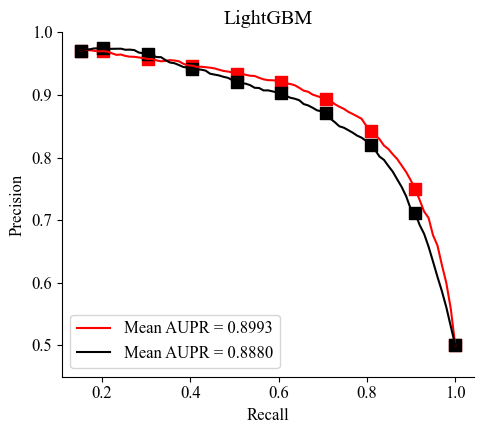

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle
plt.rcParams['font.family'] = 'Times New Roman'
# 从文件中读取列表
with open('../../result_5/result_LightGBM_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)
with open('../../result_5/result_LightGBM_random.pkl', 'rb') as f:
    Y_test_list2, y_score_RandomF_list2 = pickle.load(f)


precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(5, 4.5))
ax = plt.subplot()
for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

# 绘制平均Precision-Recall曲线
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
s_x = []
s_y = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x.append(mean_recall[i])
    s_y.append(mean_precision[i])


precisions2 = []
auprs2 = []
mean_recall2 = np.linspace(0, 1, 100)

for i in range(len(Y_test_list2)):
    Y_test2 = Y_test_list2[i]
    y_score2 = y_score_RandomF_list2[i]

    # 计算Precision-Recall曲线
    precision2, recall2, _ = precision_recall_curve(Y_test2, y_score2)
    precision_interp2 = np.interp(mean_recall2, recall2[::-1], precision2[::-1])
    precisions2.append(precision_interp2)
    aupr2 = auc(recall2, precision2)
    auprs2.append(aupr2)

# 绘制平均Precision-Recall曲线
mean_precision2 = np.mean(precisions2, axis=0)
mean_aupr2 = auc(mean_recall2, mean_precision2)
std_aupr2 = np.std(auprs2)
s_x2 = []
s_y2 = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x2.append(mean_recall2[i])
    s_y2.append(mean_precision2[i])

plt.scatter(s_x, s_y, s=80, c='red', marker='s', alpha=1)
plt.plot(mean_recall[15:], mean_precision[15:], color='red', label=f'Mean AUPR = 0.8993')
plt.scatter(s_x2, s_y2, s=80, c='black', marker='s', alpha=1)
plt.plot(mean_recall2[15:], mean_precision2[15:], color='black', label=f'Mean AUPR = 0.8880')
plt.xlabel('Recall')
plt.ylabel('Precision')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('LightGBM')
plt.legend(loc='lower left')
plt.ylim(0.45, 1)
plt.tight_layout()
plt.show()

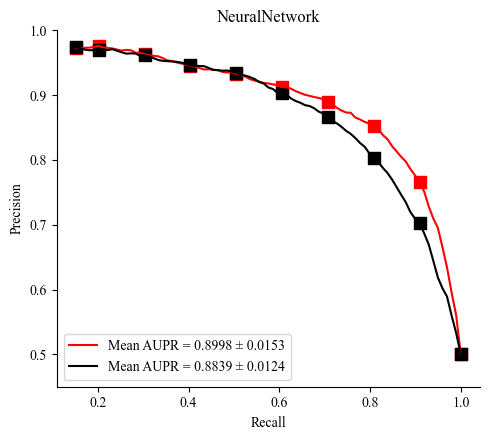

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pickle
plt.rcParams['font.family'] = 'Times New Roman'
# 从文件中读取列表
with open('../../result_5/result_NeuralNetwork_ne.pkl', 'rb') as f:
    Y_test_list, y_score_RandomF_list = pickle.load(f)
with open('../../result_5/result_NeuralNetwork_random.pkl', 'rb') as f:
    Y_test_list2, y_score_RandomF_list2 = pickle.load(f)


precisions = []
auprs = []
mean_recall = np.linspace(0, 1, 100)

# 计算每一折的曲线
plt.figure(figsize=(5, 4.5))
ax = plt.subplot()
for i in range(len(Y_test_list)):
    Y_test = Y_test_list[i]
    y_score = y_score_RandomF_list[i]

    # 计算Precision-Recall曲线
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    precision_interp = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(precision_interp)
    aupr = auc(recall, precision)
    auprs.append(aupr)

# 绘制平均Precision-Recall曲线
mean_precision = np.mean(precisions, axis=0)
mean_aupr = auc(mean_recall, mean_precision)
std_aupr = np.std(auprs)
s_x = []
s_y = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x.append(mean_recall[i])
    s_y.append(mean_precision[i])


precisions2 = []
auprs2 = []
mean_recall2 = np.linspace(0, 1, 100)

for i in range(len(Y_test_list2)):
    Y_test2 = Y_test_list2[i]
    y_score2 = y_score_RandomF_list2[i]

    # 计算Precision-Recall曲线
    precision2, recall2, _ = precision_recall_curve(Y_test2, y_score2)
    precision_interp2 = np.interp(mean_recall2, recall2[::-1], precision2[::-1])
    precisions2.append(precision_interp2)
    aupr2 = auc(recall2, precision2)
    auprs2.append(aupr2)

# 绘制平均Precision-Recall曲线
mean_precision2 = np.mean(precisions2, axis=0)
mean_aupr2 = auc(mean_recall2, mean_precision2)
std_aupr2 = np.std(auprs2)
s_x2 = []
s_y2 = []
for i in [15,20,30,40,50,60,70,80,90,99]:
    s_x2.append(mean_recall2[i])
    s_y2.append(mean_precision2[i])

plt.scatter(s_x, s_y, s=80, c='red', marker='s', alpha=1)
plt.plot(mean_recall[15:], mean_precision[15:], color='red', label=f'Mean AUPR = {mean_aupr:.4f} ± {std_aupr:.4f}')
plt.scatter(s_x2, s_y2, s=80, c='black', marker='s', alpha=1)
plt.plot(mean_recall2[15:], mean_precision2[15:], color='black', label=f'Mean AUPR = {mean_aupr2:.4f} ± {std_aupr2:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('NeuralNetwork')
plt.legend(loc='lower left')
plt.ylim(0.45, 1)
plt.tight_layout()
plt.show()

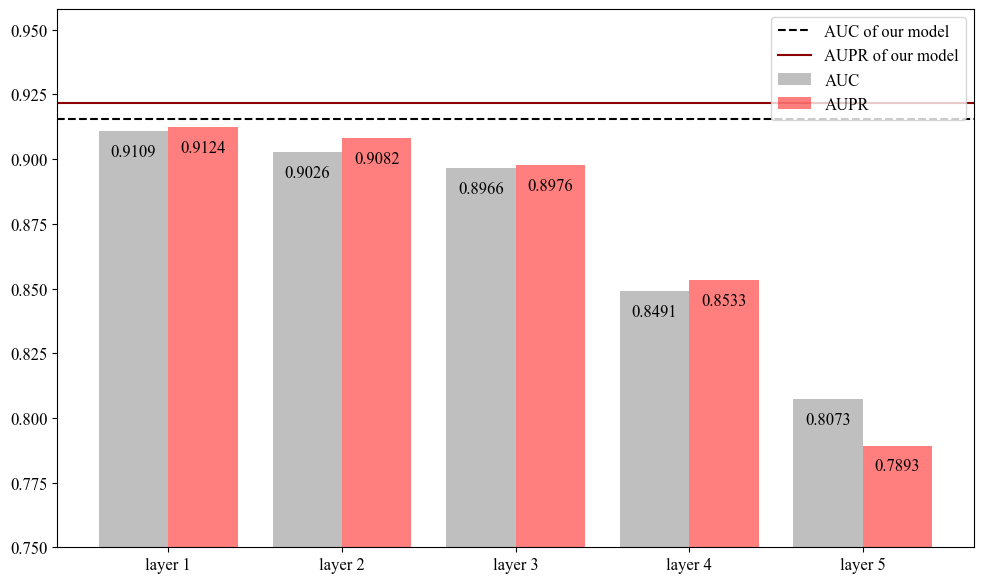

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 设置字体属性
font_prop = FontProperties(family='Times New Roman', size=12)
title_font_prop = FontProperties(family='Times New Roman', size=16)
label_font_prop = FontProperties(family='Times New Roman', size=14)

# 示例数据
categories = ['layer 1', 'layer 2', 'layer 3', 'layer 4','layer 5']
values1 = [0.9109, 0.9026,0.8966 ,0.8491, 0.8073]
values2 = [0.9124, 0.9082,0.8976 ,0.8533, 0.7893]

x = np.arange(len(categories))  # X轴的位置
width = 0.4  # 柱子的宽度
fig, ax = plt.subplots(figsize=(10, 6))


# 绘制柱状图
rects1 = ax.bar(x - width/2, values1, width,alpha = 0.5, color='gray', label='AUC')
rects2 = ax.bar(x + width/2, values2, width,alpha = 0.5, color='red', label='AUPR')

# 添加标注
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -15),  # 将标注位置设置为柱子内部
                    textcoords="offset points",
                    ha='center', va='center',  # 水平和垂直方向都居中对齐
                    fontproperties=font_prop)

add_labels(rects1)
add_labels(rects2)

# 添加水平线
ax.axhline(y=0.9157, color='black', linestyle='--', label='AUC of our model')
ax.axhline(y=0.9218, color='darkred', linestyle='-', label='AUPR of our model')

# 添加图例和标题，设置字体类型和大小
ax.set_xticks(x)
ax.set_xticklabels(categories, fontproperties=font_prop)
ax.legend(prop=font_prop, loc='upper right')
ax.set_ylim(0.75)
fig.tight_layout()

plt.show()
